<a href="https://colab.research.google.com/github/Rohit-Prasanna/sentimental_analysis_1/blob/main/sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install kaggle

In [35]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [36]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
sentiment140.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
from zipfile import ZipFile
file_name = "sentiment140.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [39]:

df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding='latin-1')
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [40]:
df.shape

(1599999, 6)

In [41]:
df.columns

Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [42]:
df1=df.rename(columns={'0':'sentiment',"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D":"text"})

In [43]:
df1=df1.drop(columns=['1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_'])

In [44]:
df1.isnull().sum()

sentiment    0
text         0
dtype: int64

In [45]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'after', 'itself', 'mustn', 'our', 'herself', 'their', 'into', 'down', 'off', 'aren', "that'll", "you'll", 'for', 'those', 'couldn', "don't", "wasn't", 'you', 'most', "shouldn't", 'he', "wouldn't", 'with', 'been', 'from', 're', 'has', 'not', "weren't", 'will', 'on', 'ain', 'these', 'this', 'very', 'his', 'too', 'were', "didn't", 'a', 'hasn', 'through', 'few', 'isn', 'to', 'how', 'yours', 'it', 'further', "aren't", 'so', 'i', 'wasn', 'are', 'no', 'is', 'up', 'then', "should've", 'doing', 'd', 'should', 'we', 'than', 'yourselves', 'shan', 'some', 'other', 'that', 'haven', 'myself', "shan't", 'which', "you've", 'weren', 'below', "isn't", 'in', 'both', 'by', 'having', 'its', 'had', 'being', 'am', "needn't", "she's", 'did', "mustn't", 'against', 'shouldn', 'but', "mightn't", 'themselves', "hadn't", 'your', 'more', 'an', 'have', 'o', 'hadn', 'at', 'the', 'can', 'only', 'each', 'just', 'her', 's', 'or', 'own', 'whom', 'now', 't', 'don', 'under', 'm', 'about', 'between', "it's", "you'd", 'out

In [47]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'itself', 'our', 'mill', 'into', 'down', 'beforehand', 'rather', 'across', 'bill', 'amoungst', 'describe', 'even', 'you', 'however', 'been', 'nine', 'mostly', 're', 'sometimes', 'these', 'several', 'whose', 'were', 'part', 'a', 'formerly', 'few', 'through', 'yet', 'to', 'although', 'how', 'detail', 'moreover', 'along', 'top', 'it', 'six', 'eleven', 'four', 'de', 'everything', 'seem', 'ever', 'i', 'are', 'no', 'up', 'nobody', 'then', 'co', 'also', 'three', 'should', 'anywhere', 'than', 'made', 'fifty', 'must', 'some', 'thereupon', 'upon', 'that', 'myself', 'hundred', 'thence', 'which', 'someone', 'in', 'might', 'seems', 'former', 'by', 'had', 'its', 'see', 'namely', 'am', 'mine', 'within', 'onto', 'themselves', 'cry', 'enough', 'throughout', 'become', 'more', 'system', 'becoming', 'nevertheless', 'twelve', 'the', 'can', 'anyhow', 'go', 'take', 'done', 'whoever', 'otherwise', 'her', 'alone', 'ltd', 'or', 'often', 'whence', 'now', 'find', 'thereby', 'under', 'around', 'ten', 'still', 'he

In [48]:
combined_stopwords=nltk_stopwords.union(sklearn_stopwords)

In [49]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [50]:
!pip install contractions==0.1.72

In [51]:
import contractions
def cleaning(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in combined_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [52]:
df1['clean_text'] = df1['text'].apply(cleaning)
# cleaned_tweets = list(df1['text'].apply(cleaning))
# print(cleaned_tweets[:10])

In [53]:
df1.head()

,sentiment,text,clean_text
0,0,is upset that he can't update his Facebook by ...,upset update facebook texting result school to...
1,0,@Kenichan I dived many times for the ball. Man...,dived time ball managed save rest bound
2,0,my whole body feels itchy and like its on fire,body feel itchy like
3,0,"@nationwideclass no, it's not behaving at all....",behaving mad
4,0,@Kwesidei not the whole crew,crew


['upset', 'update', 'facebook', 'texting', 'result', 'school', 'today', 'blah', 'dived', 'time', 'ball', 'managed', 'save', 'rest', 'bound', 'body', 'feel', 'itchy', 'like', 'behaving', 'mad', 'crew', 'need', 'hug', 'hey', 'long', 'time', 'yes', 'rain', 'bit', 'bit', 'lol', 'fine', 'thanks', 'nope', 'que', 'muera', 'spring', 'break', 'plain', 'city', 'snowing', 'pierced', 'ear', 'bear', 'watch', 'thought', 'loss', 'embarrassing', 'count']


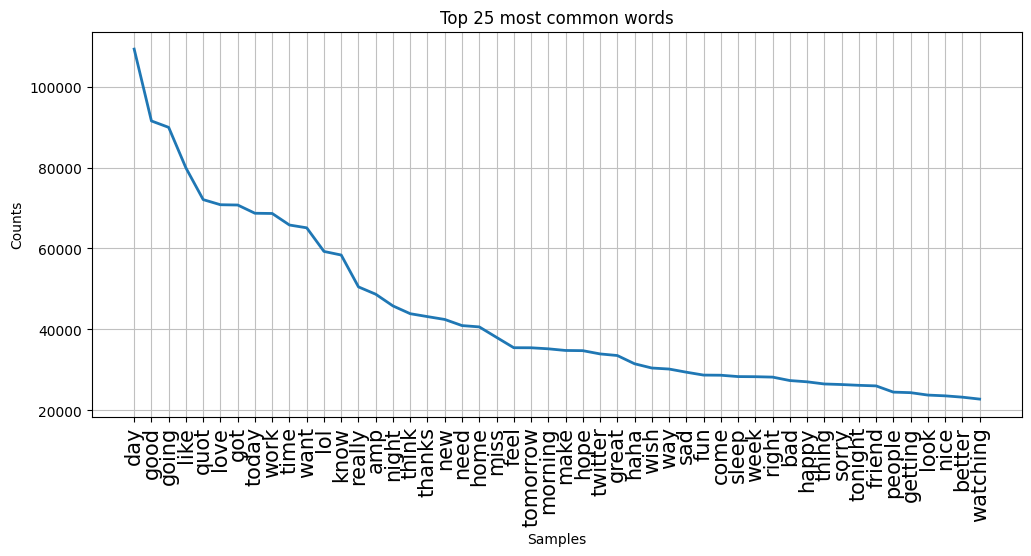

In [54]:
all_words = []
for t in df1 ['clean_text']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(50, cumulative=False)

plt.show()

In [55]:
domain_stopwords = ['day', 'today', 'tomorrow', 'morning', 'time','tonight','people','friend','twitter','facebook']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [56]:
import contractions
def cleaningN(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)
    new_text = new_text.lower().strip()

    new_text = [token for token in new_text.split() if token not in final_stopwords]

    new_text = [token for token in new_text if len(token)>2]

    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '

    return cleaned_text

In [57]:
df1['clean_text'] = df1['text'].apply(cleaningN)

In [58]:
x= df1['clean_text'].values
y=df1['sentiment'].values

In [59]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [60]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)


In [61]:
import sklearn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [62]:
x_train_pred=model.predict(x_train)
arracy_train=sklearn.metrics.accuracy_score(y_train,x_train_pred)
arracy_train

0.7921599938749952

In [63]:
x_test_pred=model.predict(x_test)
arracy_test=sklearn.metrics.accuracy_score(y_test,x_test_pred)
arracy_test

0.7671

In [65]:
import pickle

In [66]:
filename='senti_finalized_model.sav'
pickle.dump(model,open(filename,'wb'))

In [67]:
load_model=pickle.load(open("/content/senti_finalized_model.sav",'rb'))

In [69]:
print(y_test[1680])
predict=load_model.predict(x_test[1680])
print(predict)

if predict==0:
  print("negative")
else:
  print("positive")

4
[4]
positive
